In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [12]:
# 1. Load the dataset
df = pd.read_csv("H:\\folder\\Day_2\\CarsDatasets2025.csv", encoding="latin1")

In [30]:
df.columns = df.columns.str.replace(" ", "_")
df


,Company_Names,Cars_Names,Engines,CC/Battery_Capacity,HorsePower,Total_Speed,Performance(0_-_100_)KM/H,Cars_Prices,Fuel_Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963,340.0,2.5,"$1,100,000",plug in hyrbrid,2.0,800.0
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563,250.0,5.3,"$460,000",Petrol,5.0,900.0
2,Ford,KA+,1.2L Petrol,"1,200 cc",70,165.0,10.5,"$12,000-$15,000",Petrol,5.0,120.0
3,MERCEDES,GT 63 S,V8,"3,982 cc",630,250.0,3.2,"$161,000",Petrol,4.0,900.0
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602,320.0,3.6,"$253,290",Petrol,2.0,560.0
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240,180.0,7.6,"$43,590  $48,000",Hybrid (Gas + Electric),5.0,239.0
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326,180.0,6.8,"$50,000",Hybrid,7.0,630.0
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,169,190.0,NaN,"$25,210  $29,135",Gas / Hybrid,5.0,NaN
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,140,180.0,NaN," 33,000",Hybrid,5.0,NaN


In [18]:
# 1. HorsePower
df["HorsePower"] = df["HorsePower"].astype(str).str.replace(" hp", "", regex=False)
df["HorsePower"] = df["HorsePower"].str.extract("(\\d+)")
df["HorsePower"] = pd.to_numeric(df["HorsePower"], errors="coerce")

In [19]:
# 2. Total Speed
df["Total_Speed"] = df["Total_Speed"].astype(str).str.replace(" km/h", "", regex=False)
df["Total_Speed"] = pd.to_numeric(df["Total_Speed"], errors="coerce")


In [22]:
# 3. Performance
df["Performance(0 - 100 )KM/H"] = df["Performance(0 - 100 )KM/H"].astype(str).str.replace(" sec", "", regex=False)
df["Performance(0 - 100 )KM/H"] = pd.to_numeric(df["Performance(0 - 100 )KM/H"], errors="coerce")


In [24]:
# 4. Torque
df["Torque"] = df["Torque"].astype(str).str.replace(" Nm", "", regex=False)
df["Torque"] = df["Torque"].astype(str).str.replace(",", "", regex=False)
df["Torque"] = df["Torque"].apply(
    lambda x: np.mean([float(i) for i in x.split("-")]) if "-" in x else pd.to_numeric(x, errors="coerce")
)

In [25]:
# 5. Seats to numeric

df["Seats"] = pd.to_numeric(df["Seats"], errors="coerce")


In [ ]:
# 6. 
df["Total Speed"] = df["Total Speed"].astype(str).str.replace(" km/h", "", regex=False)
df["Total Speed"] = pd.to_numeric(df["Total Speed"], errors="coerce")

In [26]:
print("\nData Types after Cleaning:\n", df.dtypes)
print("\nCleaned Data Sample:\n", df.head())


Data Types after Cleaning:
 Company Names                 object
Cars Names                    object
Engines                       object
CC/Battery Capacity           object
HorsePower                     int64
Total Speed                  float64
Performance(0 - 100 )KM/H    float64
Cars Prices                   object
Fuel Types                    object
Seats                        float64
Torque                       float64
dtype: object

Cleaned Data Sample:
   Company Names     Cars Names      Engines CC/Battery Capacity  HorsePower  \
0       FERRARI  SF90 STRADALE           V8             3990 cc         963   
1   ROLLS ROYCE        PHANTOM          V12             6749 cc         563   
2          Ford            KA+  1.2L Petrol            1,200 cc          70   
3      MERCEDES        GT 63 S           V8            3,982 cc         630   
4          AUDI     AUDI R8 Gt          V10            5,204 cc         602   

   Total Speed  Performance(0 - 100 )KM/H      Cars 

In [28]:
df


,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963,340.0,2.5,"$1,100,000",plug in hyrbrid,2.0,800.0
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563,250.0,5.3,"$460,000",Petrol,5.0,900.0
2,Ford,KA+,1.2L Petrol,"1,200 cc",70,165.0,10.5,"$12,000-$15,000",Petrol,5.0,120.0
3,MERCEDES,GT 63 S,V8,"3,982 cc",630,250.0,3.2,"$161,000",Petrol,4.0,900.0
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602,320.0,3.6,"$253,290",Petrol,2.0,560.0
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240,180.0,7.6,"$43,590  $48,000",Hybrid (Gas + Electric),5.0,239.0
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326,180.0,6.8,"$50,000",Hybrid,7.0,630.0
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,169,190.0,NaN,"$25,210  $29,135",Gas / Hybrid,5.0,NaN
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,140,180.0,NaN," 33,000",Hybrid,5.0,NaN


In [34]:
import pandas as pd
import numpy as np
import re
import csv

FILE = "H:\\folder\\Day_2\\CarsDatasets2025.csv"
df = robust_read_csv(FILE)

# ---------- 1) Robust read ----------
def robust_read_csv(path):
    # try utf-8; fall back to latin1/cp1252; use Python engine for odd rows
    encodings = ["utf-8", "latin1", "cp1252"]
    last_err = None
    for enc in encodings:
        try:
            df = pd.read_csv(
                path,
                encoding=enc,
                engine="python",
                skip_blank_lines=True,
                on_bad_lines="skip",            # skip lines with wildly wrong comma counts
                quoting=csv.QUOTE_MINIMAL,
                skipinitialspace=True
            )
            return df
        except Exception as e:
            last_err = e
    raise last_err





In [35]:
# ---------- 2) Header normalization ----------
def normalize_cols(cols):
    out = []
    for c in cols:
        c = str(c)
        c = c.strip()
        c = c.replace("\xa0", " ")                 # non-breaking space
        c = re.sub(r"\s+", "_", c)                 # spaces -> underscore
        c = c.replace("/", "_").replace("(", "_").replace(")", "_").replace("-", "_")
        c = re.sub(r"__+", "_", c)                 # collapse multiple underscores
        c = re.sub(r"[^0-9a-zA-Z_]", "", c)        # keep alnum + underscore
        c = c.strip("_")
        out.append(c)
    return out

df.columns = normalize_cols(df.columns)

# Quick peek
print(df.shape)
df.head(3)



(1218, 11)


,Company_Names,Cars_Names,Engines,CC_Battery_Capacity,HorsePower,Total_Speed,Performance_0_100_KM_H,Cars_Prices,Fuel_Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm


In [36]:
# ---------- 3) Helpers to clean numbers ----------
def to_number(x):
    """Extract numbers from messy strings. Handles commas, currency, units,
    and ranges like '12,000—15,000' (averages)."""
    if pd.isna(x): 
        return np.nan
    s = str(x)
    s = s.replace("\xa0", " ")                     # nbsp
    s = s.replace(",", "")
    s = s.replace("—", "-").replace("–", "-")      # normalize dashes
    # remove obvious text tokens
    s = re.sub(r"(km/h|sec|hp|Nm|cc|batt|battery|KM/H|Math input error)", "", s, flags=re.I)
    # keep digits, dot, sign, dash
    nums = re.findall(r"[-+]?\d*\.?\d+", s)
    if not nums:
        return np.nan
    vals = [float(n) for n in nums]
    return float(np.mean(vals))  # average if it's a range

def clean_torque(x):
    return to_number(x)

def clean_price(x):
    # remove currency symbols then reuse to_number (handles ranges)
    if pd.isna(x): 
        return np.nan
    s = str(x).replace("$", "").replace("₹", "").replace("€", "").replace("£","")
    return to_number(s)

def first_number(x):
    """Grab the first meaningful number (useful for CC/Battery_Capacity)."""
    if pd.isna(x): 
        return np.nan
    s = str(x).replace(",", "")
    m = re.search(r"\d*\.?\d+", s)
    return float(m.group()) if m else np.nan



In [37]:
# ---------- 4) Column-specific cleaning ----------
# rename likely columns to predictable names if present
rename_map = {
    "Cars_Prices": "price",
    "Cars_PricesKMH": "price",   # just in case header mangled
    "Performance0___100__KMH": "perf_0_100_s",
    "Performance0__100__KMH": "perf_0_100_s",
    "Performance0__100__": "perf_0_100_s",
    "Performance0___100_": "perf_0_100_s",
    "Total_Speed": "top_speed_kmh",
    "HorsePower": "horsepower",
    "Seats": "seats",
    "Torque": "torque_nm",
    "CC_Battery_Capacity": "cc_capacity",
    "CCBattery_Capacity": "cc_capacity",
}
df = df.rename(columns={c: rename_map.get(c, c) for c in df.columns})

# Clean numeric-ish columns if they exist
if "horsepower" in df:
    df["horsepower"] = df["horsepower"].apply(to_number)

if "top_speed_kmh" in df:
    df["top_speed_kmh"] = df["top_speed_kmh"].apply(to_number)

# Handle multiple performance header variants
perf_cols = [c for c in df.columns if c.lower().startswith("performance")]
for c in perf_cols:
    df[c] = df[c].apply(to_number)
    df = df.rename(columns={c: "perf_0_100_s"})  # unify name to one column
# If multiple perf columns ended up the same name, keep first non-null
if "perf_0_100_s" in df:
    if isinstance(df["perf_0_100_s"], pd.core.series.Series):
        pass

if "price" in df:
    df["price"] = df["price"].apply(clean_price)

if "torque_nm" in df:
    df["torque_nm"] = df["torque_nm"].apply(clean_torque)

if "seats" in df:
    df["seats"] = pd.to_numeric(df["seats"], errors="coerce")

if "cc_capacity" in df:
    df["cc_capacity"] = df["cc_capacity"].apply(first_number)



In [38]:
# ---------- 5) Trim whitespace in object columns ----------
for c in df.select_dtypes(include="object").columns:
    df[c] = df[c].astype(str).str.strip().replace({"nan": np.nan})



In [39]:
# ---------- 6) Basic sanity filters (optional) ----------
# Remove rows that are clearly broken after parsing (e.g., no car name & no company)
key_text_cols = [c for c in ["Company_Names", "Cars_Names", "CompanyNames", "CarsNames"] if c in df.columns]
if key_text_cols:
    keep_mask = np.zeros(len(df), dtype=bool)
    for c in key_text_cols:
        keep_mask |= df[c].notna() & (df[c].astype(str).str.len() > 0)
    df = df[keep_mask]



In [40]:
# ---------- 7) Final check & save ----------
print("\nDtypes:\n", df.dtypes)
print("\nSample:\n", df.head(8))
print("\nMissing per column:\n", df.isna().sum())




Dtypes:
 Company_Names     object
Cars_Names        object
Engines           object
cc_capacity      float64
horsepower       float64
top_speed_kmh    float64
perf_0_100_s     float64
price            float64
Fuel_Types        object
seats            float64
torque_nm        float64
dtype: object

Sample:
   Company_Names            Cars_Names      Engines  cc_capacity  horsepower  \
0       FERRARI         SF90 STRADALE           V8       3990.0       963.0   
1   ROLLS ROYCE               PHANTOM          V12       6749.0       563.0   
2          Ford                   KA+  1.2L Petrol       1200.0        -7.5   
3      MERCEDES               GT 63 S           V8       3982.0       630.0   
4          AUDI            AUDI R8 Gt          V10       5204.0       602.0   
5           BMW          Mclaren 720s           V8       3994.0       710.0   
6  ASTON MARTIN            VANTAGE F1           V8       3982.0       656.0   
7       BENTLEY  Continental GT Azure           V8       39

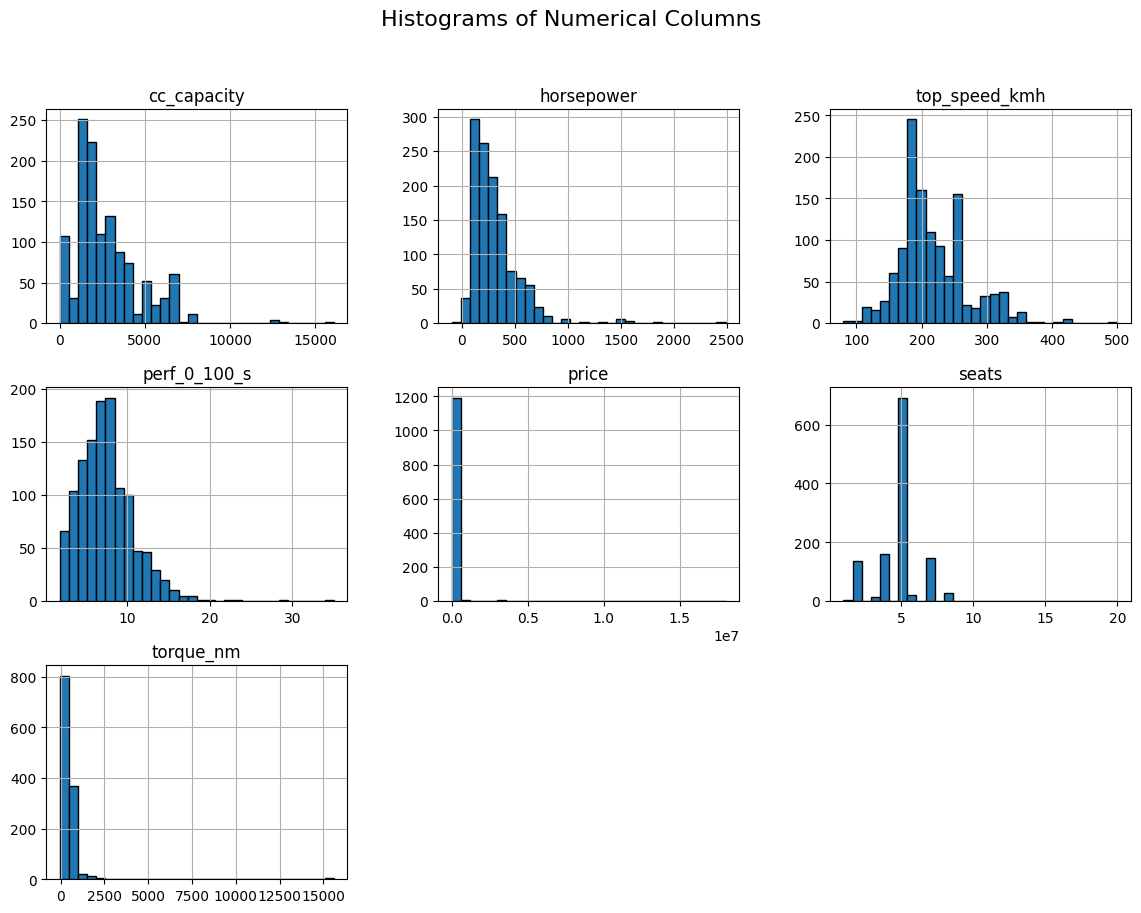

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- Histograms ----------
df.hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Columns", fontsize=16)
plt.show()


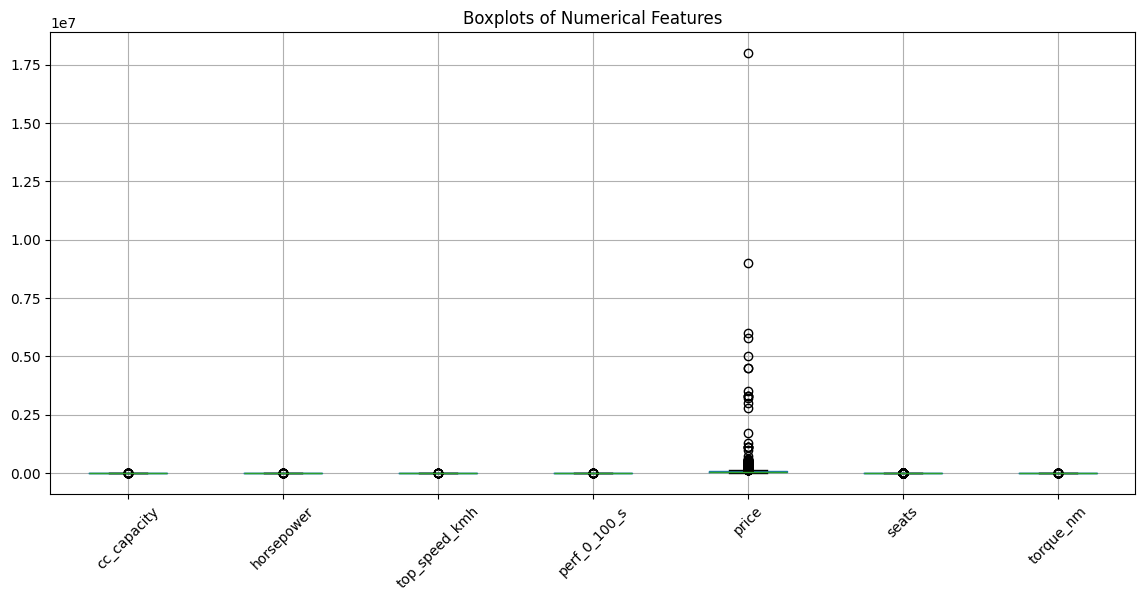

In [42]:

# ---------- Boxplots ----------
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

plt.figure(figsize=(14, 6))
df[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()



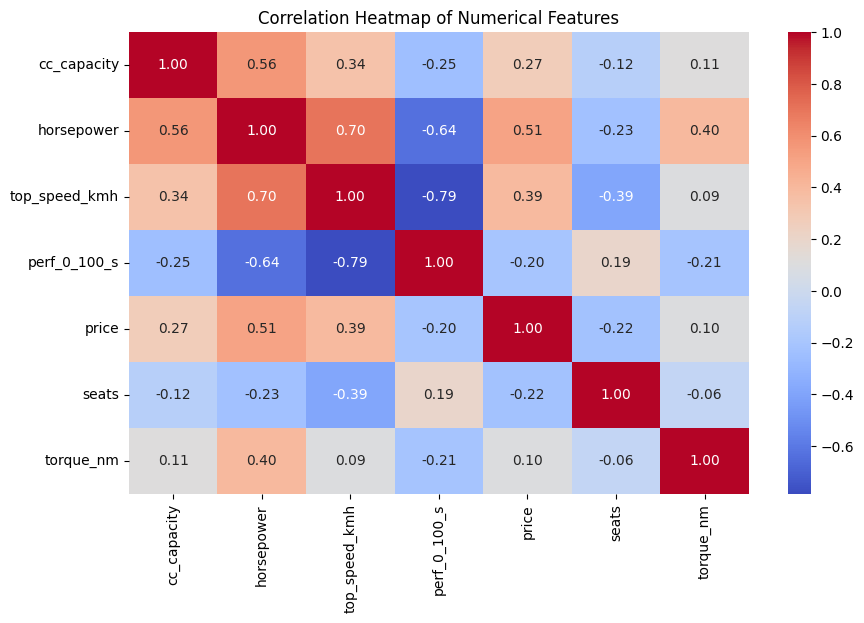

In [43]:
# ---------- Correlation Heatmap ----------
plt.figure(figsize=(10, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [44]:
# Count missing values per column
print(df.isna().sum())

# Percentage of missing values
print((df.isna().mean() * 100).round(2))


Company_Names     0
Cars_Names        0
Engines           0
cc_capacity       5
horsepower        0
top_speed_kmh     0
perf_0_100_s      6
price             1
Fuel_Types        0
seats            12
torque_nm         1
dtype: int64
Company_Names    0.00
Cars_Names       0.00
Engines          0.00
cc_capacity      0.41
horsepower       0.00
top_speed_kmh    0.00
perf_0_100_s     0.49
price            0.08
Fuel_Types       0.00
seats            0.99
torque_nm        0.08
dtype: float64


In [49]:
# Drop rows where critical columns are missing
df = df.dropna(subset=["Cars_Names", "Company_Names","cc_capacity","perf_0_100_s","seats"])

# Count missing values per column
print(df.isna().sum())

# Percentage of missing values
print((df.isna().mean() * 100).round(2))

Company_Names    0
Cars_Names       0
Engines          0
cc_capacity      0
horsepower       0
top_speed_kmh    0
perf_0_100_s     0
price            0
Fuel_Types       0
seats            0
torque_nm        0
dtype: int64
Company_Names    0.0
Cars_Names       0.0
Engines          0.0
cc_capacity      0.0
horsepower       0.0
top_speed_kmh    0.0
perf_0_100_s     0.0
price            0.0
Fuel_Types       0.0
seats            0.0
torque_nm        0.0
dtype: float64


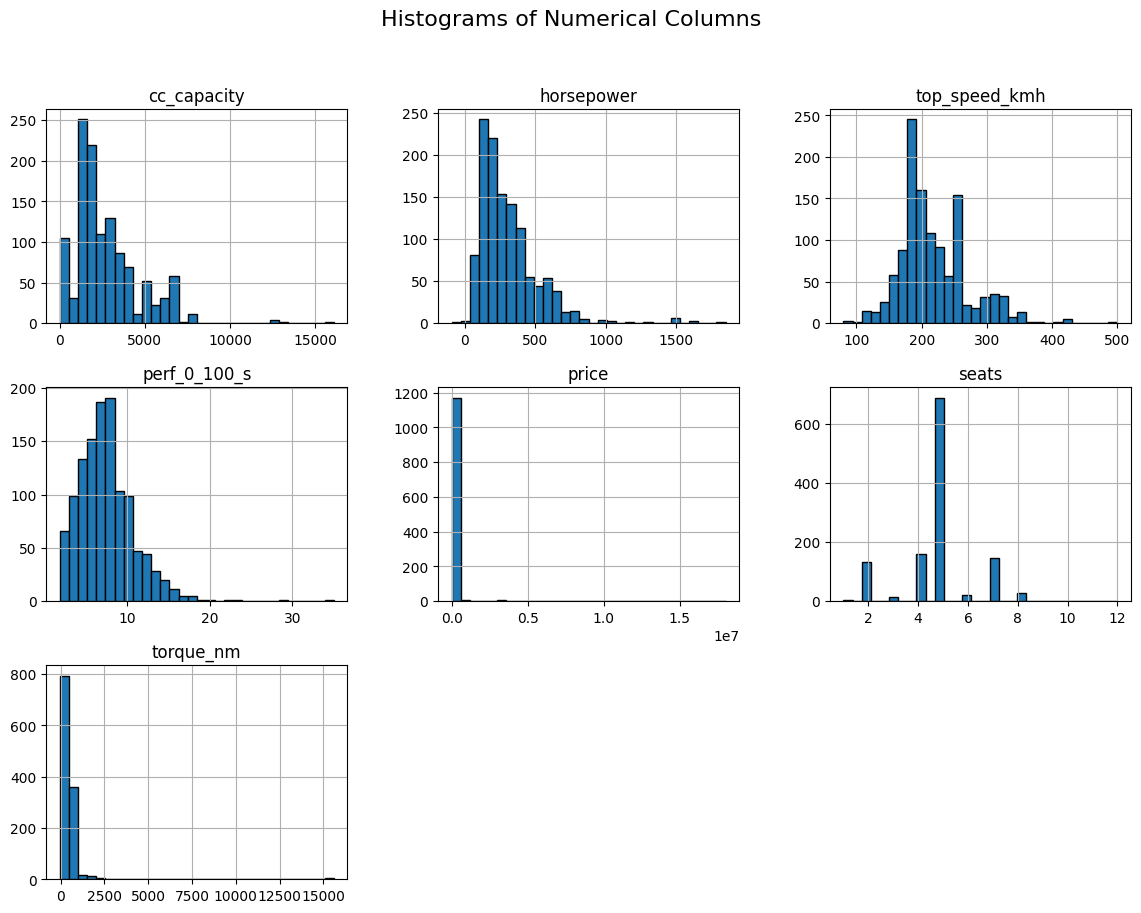

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- Histograms ----------
df.hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Columns", fontsize=16)
plt.show()

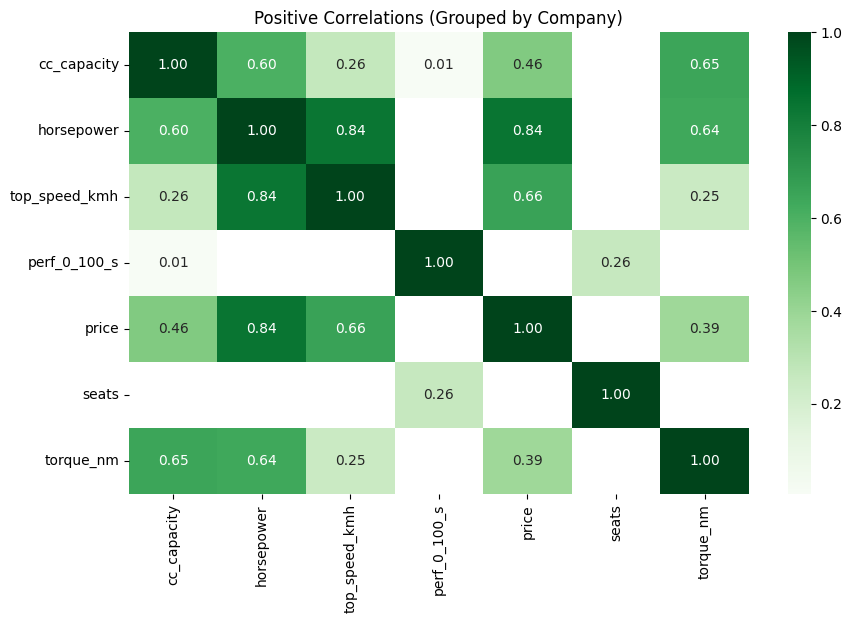

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# group by Company_Names and take mean of numeric cols
grouped = df.groupby("Company_Names").mean(numeric_only=True)

# compute correlation
corr = grouped.corr()

# filter only positive correlations (>0)
pos_corr = corr[corr > 0]

# plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pos_corr, annot=True, cmap="Greens", fmt=".2f")
plt.title("Positive Correlations (Grouped by Company)")
plt.show()


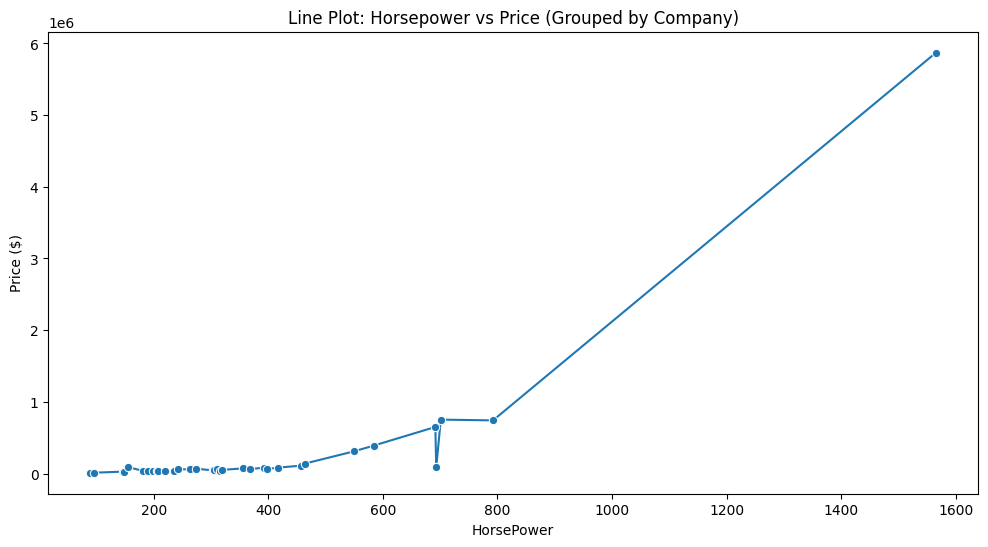

In [52]:
# Example line plot: avg HorsePower vs avg Price per company
plt.figure(figsize=(12,6))
sns.lineplot(data=grouped, x="horsepower", y="price", marker="o")
plt.title("Line Plot: Horsepower vs Price (Grouped by Company)")
plt.xlabel("HorsePower")
plt.ylabel("Price ($)")
plt.show()
